In [1]:
import torch
%matplotlib inline
import matplotlib.pyplot as plt
from Models.MLP import MLP
import numpy as np

In [2]:
scheduler1 = torch.optim.lr_scheduler.LinearLR(
    torch.optim.Adam(MLP(1,).parameters(), lr=1e-4),
    total_iters= 20,
    start_factor = 1e-3
)
scheduler2 = torch.optim.lr_scheduler.LinearLR(
    torch.optim.Adam(MLP(1,).parameters(), lr=1e-4),
    total_iters= 40,
    start_factor = 1e-3
)

lr1 = []
lr2 = []
for i in range(50):
    lr1.append(scheduler1.get_last_lr())
    scheduler1.step()

    lr2.append(scheduler2.get_last_lr())
    scheduler2.step()

/home/florenthervers/miniconda3/envs/TFE/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


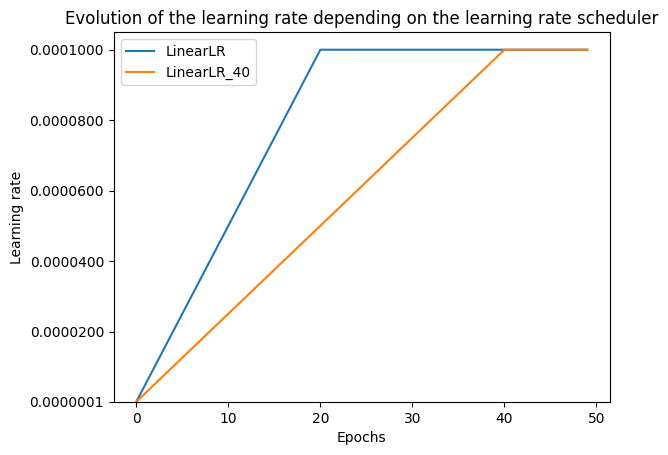

In [3]:
plt.plot(np.arange(0,50),lr1,  label="LinearLR")
plt.plot(np.arange(0,50),lr2,  label="LinearLR_40")
plt.ylabel("Learning rate")
plt.xlabel("Epochs")
plt.ylim(bottom=1e-6)
plt.yticks([1e-4,8e-5,6e-5,4e-5,2e-5,1e-7])
plt.legend()
plt.title("Evolution of the learning rate depending on the learning rate scheduler")
plt.show()

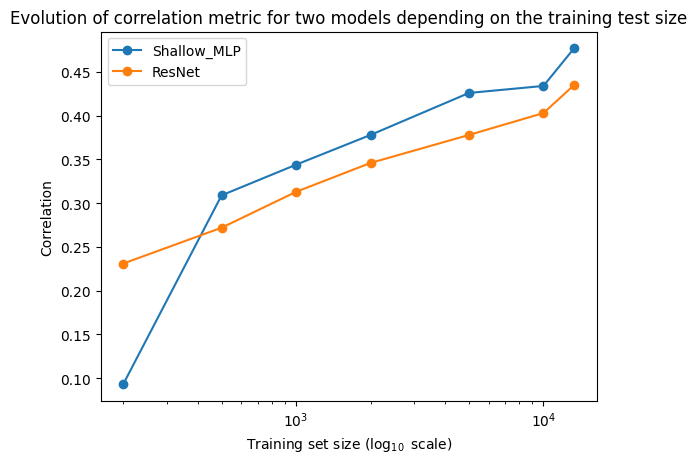

In [21]:
dataset_size = [200, 500, 1000, 2000, 5000, 10000, 13300]
MLP_results = [0.093, 0.309, 0.344, 0.378, 0.426, 0.434, 0.477]
ResNet_results = [0.231, 0.272, 0.313, 0.346, 0.378, 0.403, 0.435]
plt.plot(dataset_size, MLP_results, "o-", label="Shallow_MLP")
plt.plot(dataset_size, ResNet_results, "-o", label="ResNet")
plt.ylabel("Correlation")
plt.xlabel("Training set size ($\log_{10}$ scale)")
plt.xscale("log")
plt.legend()
plt.title("Evolution of correlation metric for two models depending on the training test size")
plt.show()